In [33]:
import sys
!{sys.executable} -m pip install mplfinance
import mplfinance as mpfnew
import mpl_finance as mpfold
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.dates as dates
from datetime import datetime
from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
import json
import os
strRoot='D:\\denbrige\\180 FxOption\\103 FxOptionVerBack\\083 FX-Git-Pull\\14docktrader\\config\\'
with open(strRoot + 'iex.conf') as fJsn:
    jsnIEX = json.load(fJsn)

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [29]:
start=datetime(2019, 2, 9)
end=datetime(2020,2,11)
f = get_historical_data('AAPL', start, end, output_format='pandas', token=jsnIEX['iextoken'])
f.columns=["Open", "High", "Low", "Close", "Volume"]
print(f)

              Open    High     Low   Close    Volume
date                                                
2019-02-11  171.05  171.21  169.25  169.43  20993425
2019-02-12  170.10  171.00  169.70  170.89  22283523
2019-02-13  171.39  172.48  169.92  170.18  22490233
2019-02-14  169.71  171.26  169.38  170.80  21835747
2019-02-15  171.25  171.70  169.75  170.42  24626814
...            ...     ...     ...     ...       ...
2020-02-05  323.52  324.76  318.95  321.45  29706718
2020-02-06  322.57  325.22  320.26  325.21  26356385
2020-02-07  322.37  323.40  318.00  320.03  29421012
2020-02-10  314.18  321.55  313.85  321.55  27337215
2020-02-11  323.60  323.90  318.71  319.61  23580780

[253 rows x 5 columns]


In [95]:
def MpfPlot538(ohlc):
    # values that can be parameterized
    intEmaPeriod = 34
    
    # extract OHLC into a list of lists
    lohlc = ohlc[['Open', 'High', 'Low', 'Close']].values.tolist()
    
    # convert dates in datetime format to mathplotlib dates
    mdates = dates.date2num(ohlc.index)
    
    # prepare ohlc in mathplotlib format
    mohlc = [ [mdates[i]] + lohlc[i] for i in range(len(mdates)) ]
    
    pyplot.style.use('fivethirtyeight')
    fig, ax = pyplot.subplots(figsize = (12,6))
    
    # mpfold.plot_day_summary_ohlc(ax, mohlc[-50:], ticksize=5) # alternatively, use a barchart
    mpfold.candlestick_ohlc(ax, mohlc[-50:], width=0.4)

    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('Bar Chart')
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))
    fig.autofmt_xdate()
    
    # plt.show() # add this if you're not using Jupyter Notebook
    
def MpfPlotWave(ohlc):
    # values that can be parameterized
    intEmaPeriod = 34
    intBars = 90
    if (intBars+intEmaPeriod > len(ohlc)):
        print("Error: Bars + EmaPeriod exceeds ohlc " + str(len(ohlc)-intBars-intEmaPeriod))
        return
    
    hEma = ohlc['High'].ewm(intEmaPeriod).mean()
    cEma = ohlc['Close'].ewm(intEmaPeriod).mean()
    lEma = ohlc['Low'].ewm(intEmaPeriod).mean()
    
    # extract OHLC into a list of lists
    lohlc = ohlc[['Open', 'High', 'Low', 'Close']].values.tolist()
    
    # convert dates in datetime format to mathplotlib dates
    mdates = dates.date2num(ohlc.index)
    
    # prepare ohlc in mathplotlib format
    mohlc = [ [mdates[i]] + lohlc[i] for i in range(len(mdates)) ]
    
    fig, ax = pyplot.subplots(figsize = (24,24))
    
    # mpfold.plot_day_summary_ohlc(ax, mohlc[-50:], ticksize=5, colorup='#77d879', colordown='#db3f3f') # alternatively, use a barchart
    mpfold.candlestick_ohlc(ax, mohlc[-intBars:], width=0.4, colorup='#77d879', colordown='#db3f3f')
    ax.plot(hEma[-intBars:], color='red', linewidth=2, label='high, '+str(intEmaPeriod)+'-Day EMA')
    ax.plot(cEma[-intBars:], color='green', linewidth=2, label='close, '+str(intEmaPeriod)+'-Day EMA')
    ax.plot(lEma[-intBars:], color='blue', linewidth=2, label='low, '+str(intEmaPeriod)+'-Day EMA')

    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('Candlestick Chart with '+str(intEmaPeriod)+'-Day EMA Wave')
    ax.legend()
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))
    fig.autofmt_xdate()

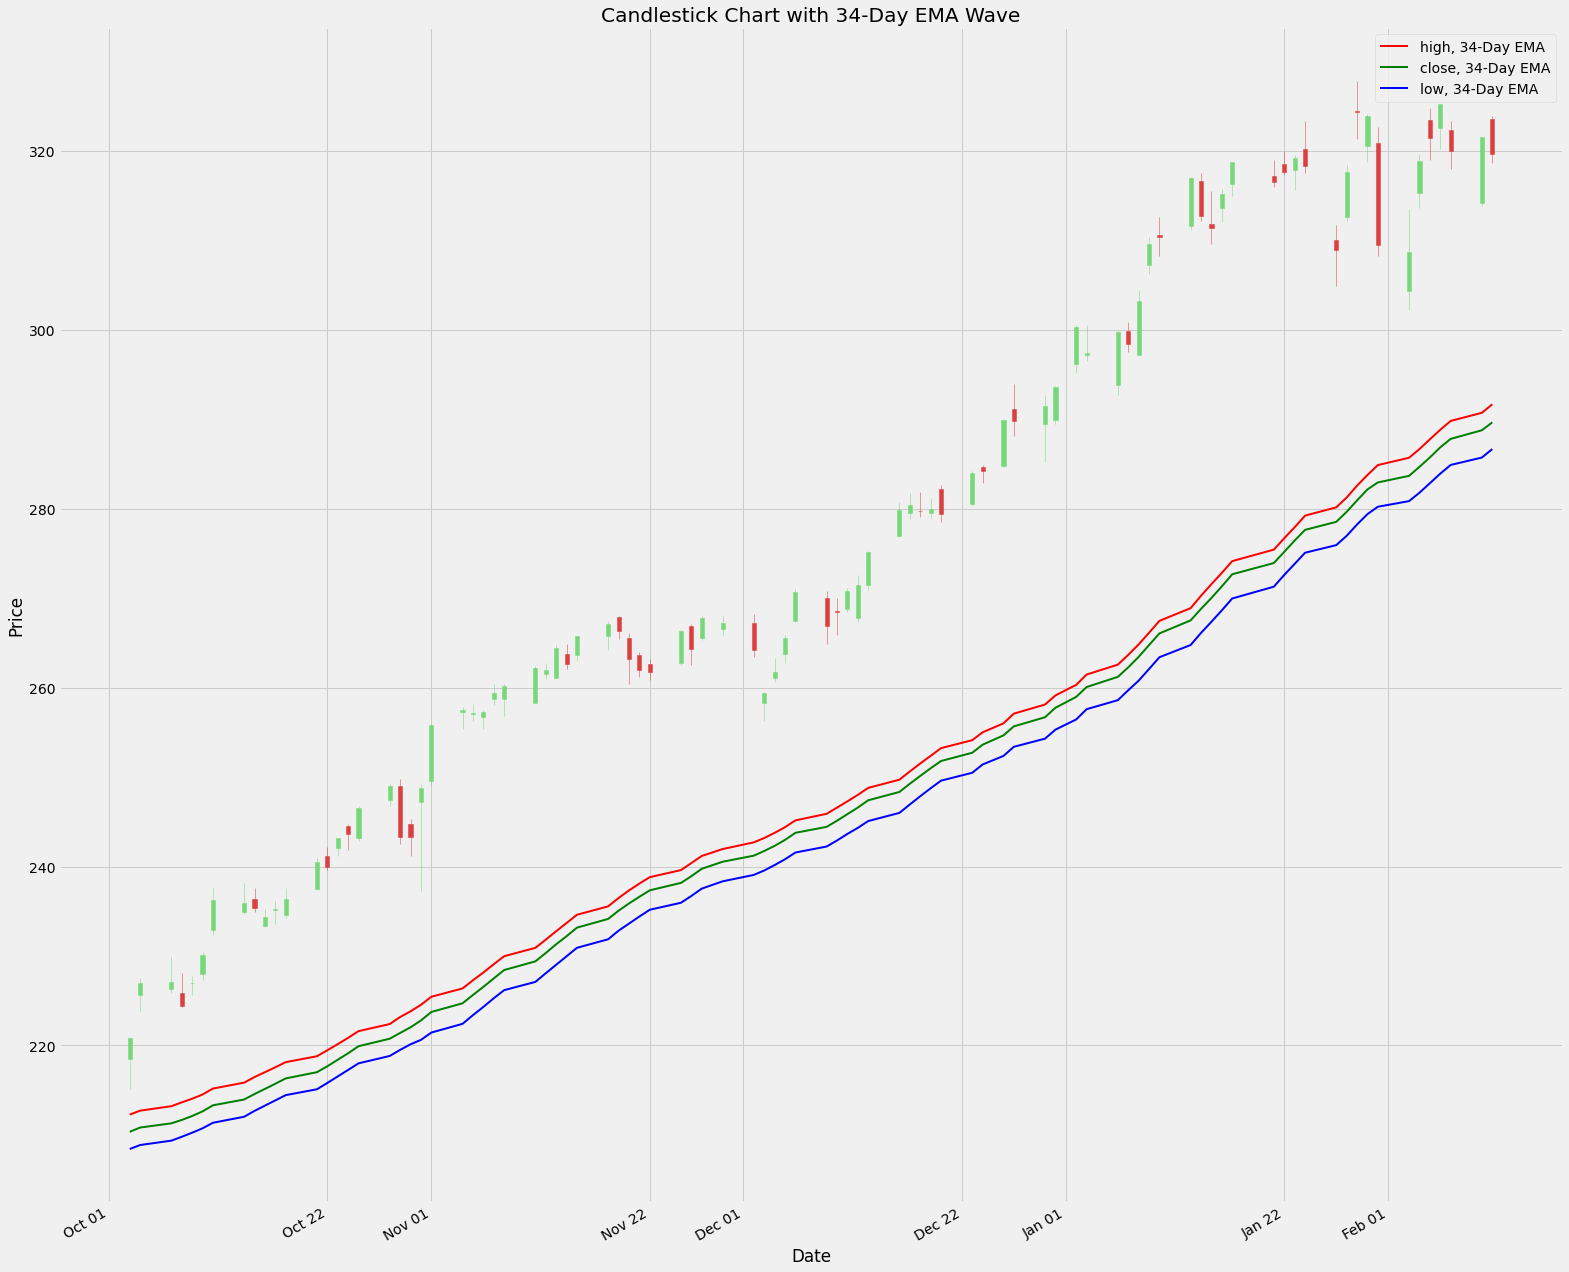

In [96]:
MpfPlotWave(f)

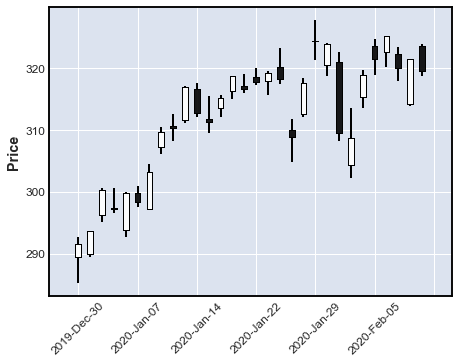

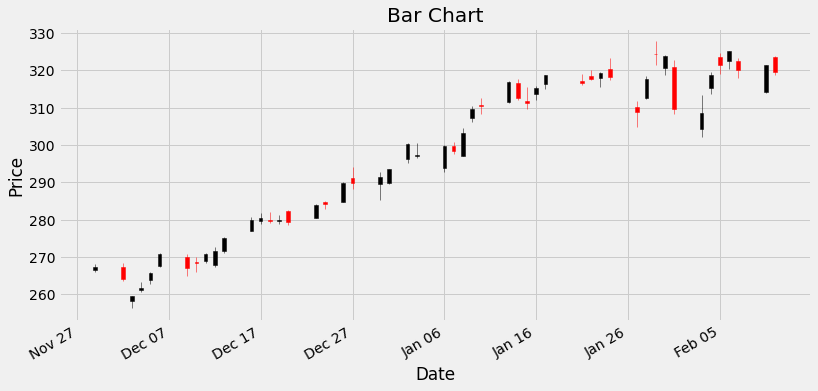

In [57]:
mpfnew.plot(f[-30:], type='candlestick')
MpfPlot538(f)